In [1]:
!pip install tensorflow==2.19.1

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2.19.1
False


# Feed Forward Neural Network

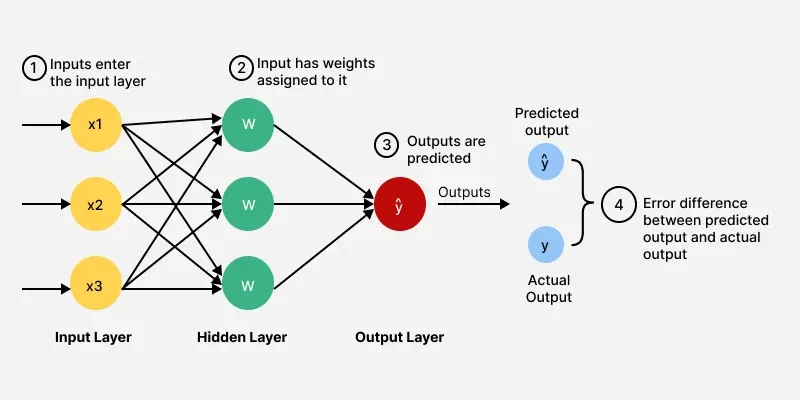

Reference Video : https://www.youtube.com/watch?v=eOtGPlAS6Yg

## What is a Feedforward Neural Network?

A Feedforward Neural Network is:

- The simplest type of artificial neural network.

- Called “feedforward” because data flows only forward: from input → hidden layers → output.

- There are no cycles or loops in the network (unlike RNNs).

## Structure of FNN

- Input Layer – Receives features from your dataset.

- Hidden Layers – One or more layers where neurons apply weights, biases, and activation functions.

- Output Layer – Produces predictions (e.g., classification or regression).

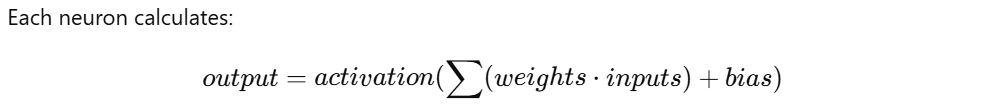

## Mathematical Representation
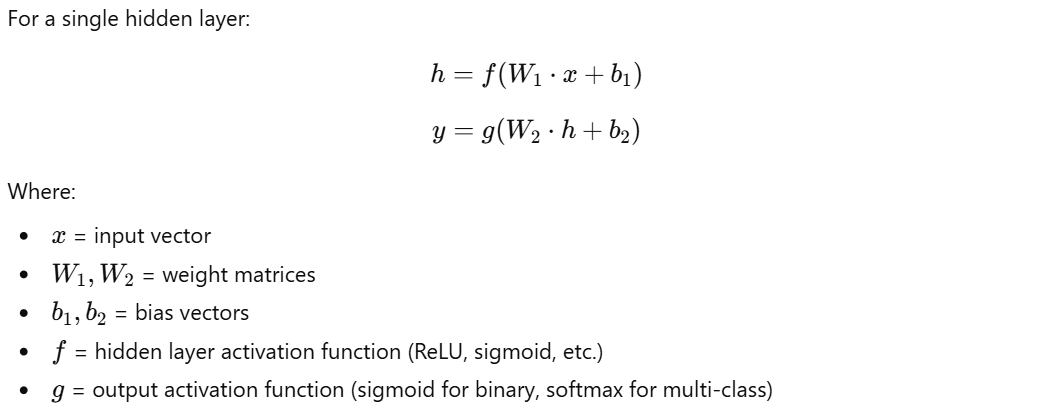

## Feedforward Process (Step by Step)

- Input features are fed to the network.

- Weighted sum + bias is computed at each neuron.

- Activation function is applied to introduce non-linearity.

- Output of one layer is the input to the next layer.

- Final output is produced in the output layer.

In [3]:
import tensorflow as tf

print("Eager execution:", tf.executing_eagerly())

sigmoid = tf.nn.sigmoid

x = tf.constant([[0.3, 0.5]], dtype=tf.float32)

W1 = tf.constant([[0.1, 0.2],
                  [0.3, 0.4]], dtype=tf.float32)
b1 = tf.constant([0.5, 0.5], dtype=tf.float32)

h1 = sigmoid(tf.matmul(x, W1) + b1)

W2 = tf.constant([[0.5, 0.6],
                  [0.7, 0.8]], dtype=tf.float32)
b2 = tf.constant([0.5, 0.5], dtype=tf.float32)

h2 = sigmoid(tf.matmul(h1, W2) + b2)

W3 = tf.constant([[0.9, 0.1],
                  [0.2, 0.3]], dtype=tf.float32)

y = sigmoid(tf.matmul(h2, W3))

print("Hidden Layer 1 Output:\n", h1.numpy())
print("Hidden Layer 2 Output:\n", h2.numpy())
print("Final Output:\n", y.numpy())

Eager execution: True
Hidden Layer 1 Output:
 [[0.66373867 0.68135375]]
Hidden Layer 2 Output:
 [[0.7873151 0.8089692]]
Final Output:
 [[0.7048242 0.5796708]]


In [4]:
import tensorflow as tf
import numpy as np

print("TensorFlow version:", tf.__version__)
print("Eager execution:", tf.executing_eagerly())

TensorFlow version: 2.19.1
Eager execution: True


In [5]:
input_size = 784     # number of input features
hidden_size = 128    # hidden neurons
output_size = 10     # output classes

In [6]:
X = np.random.rand(1, input_size).astype(np.float32)

y = np.zeros((1, output_size), dtype=np.float32)
y[0][3] = 1   # suppose class = 3

In [7]:
hidden_layer = tf.keras.layers.Dense(
    units=hidden_size,
    activation='relu'
)

In [8]:
output_layer = tf.keras.layers.Dense(
    units=output_size,
    activation='softmax'
)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_size,)),
    hidden_layer,
    output_layer
])

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
output = model(X)

print("Model output:")
print(output.numpy())

Model output:
[[0.06599955 0.13487272 0.1763516  0.02364323 0.07815287 0.18868983
  0.06079246 0.0594758  0.09881307 0.11320882]]


In [12]:
output = model(X)

print("Model output:")
print(output.numpy())

Model output:
[[0.06599955 0.13487272 0.1763516  0.02364323 0.07815287 0.18868983
  0.06079246 0.0594758  0.09881307 0.11320882]]


In [13]:
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step - accuracy: 0.0000e+00 - loss: 3.7447
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.5359
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.4357
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.1245
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0465


In [14]:
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        print("\nLayer:", layer.name)
        print("Weights shape:", W.shape)
        print("Bias shape:", b.shape)


Layer: dense
Weights shape: (784, 128)
Bias shape: (128,)

Layer: dense_1
Weights shape: (128, 10)
Bias shape: (10,)
